In [285]:
import pandas as pd
import numpy as np
import requests

from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors


import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

import folium 

import geocoder

In [286]:
#MOJ ACCOUNT

CLIENT_ID = 'LUH5C5M1TQVF0CO5HDOYL2OUJZNIYT5OTJJN5ODADB2MZSHH' # Foursquare ID
CLIENT_SECRET = '0NKLQCRXL4R4P2BCA5RNQ0TOXNBX0ETXGWCFE1I453V453DX' # Foursquare Secret
VERSION = '20210106' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


#INIDSKI ACCOUNT

#CLIENT_ID = 'LUH5C5M1TQVF0CO5HDOYL2OUJZNIYT5OTJJN5ODADB2MZSHH'
#CLIENT_SECRET = '0NKLQCRXL4R4P2BCA5RNQ0TOXNBX0ETXGWCFE1I453V453DX'



Your credentails:
CLIENT_ID: LUH5C5M1TQVF0CO5HDOYL2OUJZNIYT5OTJJN5ODADB2MZSHH
CLIENT_SECRET:0NKLQCRXL4R4P2BCA5RNQ0TOXNBX0ETXGWCFE1I453V453DX


In [287]:
#Skopje
lat=41.9981
lng=21.4254
radius=1000
limit=100

In [288]:
url = 'https://api.foursquare.com/v2/venues/explore?q=food&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit,
            )



results = requests.get(url).json()["response"]['groups'][0]['items']

#results = requests.get(url).json()
print(results)


venues_list=[]
total_venues=[]



for item in results:
    venues_list=[]
    name=item['venue']['name'] 
    lat=item['venue']['location']['lat'] 
    lng=item['venue']['location']['lng']
    tip=item['venue']['categories'][0]['name']
    venues_list.append(name)
    venues_list.append(lat)
    venues_list.append(lng)
    venues_list.append(tip)
    total_venues.append(venues_list)

    df_total=pd.DataFrame(total_venues, columns=['name', 'lat', 'lng','categories'])


    df_total.append(df_total_new)

#df_total

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bfd4777f61dc9b61ec19ede', 'name': 'Излет', 'location': {'address': 'Мирослав Крлежа', 'lat': 41.99709433943547, 'lng': 21.424209525471344, 'labeledLatLngs': [{'label': 'display', 'lat': 41.99709433943547, 'lng': 21.424209525471344}], 'distance': 149, 'postalCode': '1000', 'cc': 'MK', 'city': 'Скопје', 'country': 'Severna Makedonija', 'formattedAddress': ['Мирослав Крлежа', '1000 Скопје', 'Severna Makedonija']}, 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4bfd4777f61dc9b61ec19ede-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionRe

<b>SELECTING THE NEEDED DATA, ACCORDING TO THE BUSINESS REQUEST, AS POINT OF INTEREST<b>

In [289]:
df_total_Restaurants = df_total.loc[ \
                                    (df_total['categories'] == 'Restaurant') \
                                    |(df_total['categories'] == 'Eastern European Restaurant') \
                                    |(df_total['categories'] == 'Modern European Restaurant') \
                                    |(df_total['categories'] == 'Comfort Food Restaurant') \
                                    |(df_total['categories'] == 'Pizza Place') \
                                    |(df_total['categories'] == 'Mexican Restaurant') \
                                    |(df_total['categories'] == 'Italian Restaurant') \
                                    |(df_total['categories'] == 'BBQ Joint') \
                                    |(df_total['categories'] == 'Lounge') \
                                    |(df_total['categories'] == 'Bistro') \
                                    |(df_total['categories'] == 'Sushi Restaurant') \
                                    |(df_total['categories'] == 'Pub') \
                                    |(df_total['categories'] == 'Gastropub') \
                                    |(df_total['categories'] == 'Seafood Restaurant')\
                                    |(df_total['categories'] == 'Vegetarian / Vegan Restaurant')\
                                    |(df_total['categories'] == 'Chinese Restaurant')\
                                    |(df_total['categories'] == 'French Restaurant')\
                                    |(df_total['categories'] == 'Latin American Restaurant')\
                                    |(df_total['categories'] == 'Fast Food Restaurant')\
                                    |(df_total['categories'] == 'Turkish Restaurant')\
                                    |(df_total['categories'] == 'Bakery')\
                                    |(df_total['categories'] == 'Café')\
                                    |(df_total['categories'] == 'Mediterranean Restaurant')\
                                    |(df_total['categories'] == 'Indian Restaurant')
                                    
                                                                                                    
                                    
                                   ]
df_total_Restaurants

,name,lat,lng,categories
0,Излет,41.997094,21.424210,Café
3,Sushico,41.999744,21.423780,Sushi Restaurant
6,Круг,41.999937,21.422997,Café
7,Горки,41.996411,21.427940,Café
8,La Delicious,41.998535,21.422922,Bakery
12,Локал45,41.999802,21.423844,Café
15,КафеСтудио 7гр.,41.998594,21.424305,Café
19,Executive Lounge of Skopje Marriott Hotel,41.996092,21.430597,Lounge
22,Градска Кафеана,41.996533,21.428250,Restaurant
25,MAD Kitchen & Bar,41.999761,21.423173,Bistro


In [290]:
df_total_Restaurants.shape

(44, 4)

In [291]:
df_categories= df_total_Restaurants.groupby(['categories']).count()

In [292]:
df_categories.drop(['lat','lng'], axis=1,inplace = True)
df_categories.rename(columns = {'name':'number_of_objects'}, inplace = True)

<b>TABLE OF CATEGORIES AND NUMBER OF OBJECT WITH FINAL VISUALIZATION<b>
                                             

In [293]:
df_categories

,number_of_objects
categories,
BBQ Joint,2
Bakery,3
Bistro,2
Café,13
Chinese Restaurant,1
Eastern European Restaurant,1
French Restaurant,1
Gastropub,2
Italian Restaurant,3


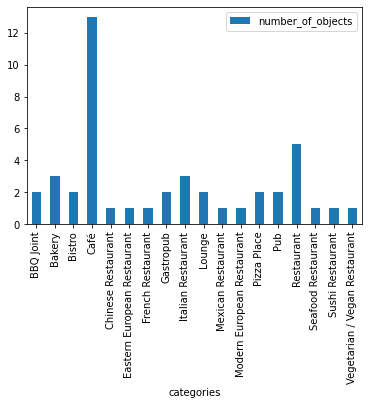

In [294]:
ax = df_categories.plot.bar()